## Project : Vendor Performance Analysis

### Business Problem

The company lacks deep analytical insights into vendor and brand performance across key areas such as sales contribution, profitability, inventory efficiency, and cost optimization. Ineffective promotional strategies, excess stock, and unoptimized purchasing volumes are impacting procurement efficiency and profitability. There is a pressing need to identify high-performing vendors, optimize procurement strategies, and make data-driven decisions based on sales trends, inventory behavior, and profit margins.

**RESERCH QUESTIONS:** -    
  
  
1. Identify Brands that need Promotional or Pricing Adjustment Which exhibit low sales performance but higher profit margins.
2. Which Vendors and Brands demonstrate the high sales performance?
3. Which Vendor Contributes the most to the total Purchase Dollars?
4. How much of total Procurement(Purchase) is depend on the top vendors?
5. Does Purchasing in Bulk reduce the unit price, and what is the optional Purchase volume for cost savings?
6. Which Vendors have low inventory turnover, indicating excess stock and slow-moving product?
7. How Much Capital is locked in Unsold inventory per vendor and which vendors contribute the most?
8. What is the 95% Confidence intervals for Profit Margin of top-performing & low-performing Vendors?
9. Is there a significant diffrence in Profit margins between top-performing & low-performing vendors?


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

import warnings
warnings.filterwarnings("ignore")

### Database Connection

In [3]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
username = "root"
password = "Akshay2706#MYSQL"
host = "localhost"
port = 3306
database = "vendors"

connection = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
        
engine = create_engine(connection)
print("MYSQL connection established successfully")        

MYSQL connection established successfully


### Loading Tables in MYSQL

In [8]:
df_begin_inventory = pd.read_csv("begin_inventory.csv")

df_begin_inventory.to_sql(name="begin_inventory", con=engine, if_exists="replace", index=False)

print("begin_inventory table loaded successfully in MYSQL")

begin_inventory table loaded successfully in MYSQL


In [9]:
df_end_inventory = pd.read_csv("end_inventory.csv")

df_end_inventory.to_sql(name="end_inventory", con=engine, if_exists="replace", index=False)

print("begin_inventory table loaded successfully in MYSQL")

begin_inventory table loaded successfully in MYSQL


In [10]:
df_purchase_prices = pd.read_csv("purchase_prices.csv")

df_purchase_prices.to_sql(name="purchase_prices", con=engine, if_exists="replace", index=False)

print("begin_inventory table loaded successfully in MYSQL")

begin_inventory table loaded successfully in MYSQL


In [11]:
df_purchases = pd.read_csv("purchases.csv")

df_purchases.to_sql(name="purchases", con=engine, if_exists="replace", index=False)

print("begin_inventory table loaded successfully in MYSQL")

begin_inventory table loaded successfully in MYSQL


In [4]:
df_vendor_invoice = pd.read_csv("vendor_invoice.csv")

df_vendor_invoice.to_sql(name="vendor_invoice", con=engine, if_exists="replace", index=False)

print("begin_inventory table loaded successfully in MYSQL")

begin_inventory table loaded successfully in MYSQL


In [7]:
#the file is too big of sales.csv, so this is the best approch to load such big files,

In [6]:
# Define chunk size (100,000 or 50,000 based on your RAM)

chunk_size = 100000
csv_file = "sales.csv"
i = 0

for chunk in pd.read_csv(csv_file, chunksize=chunk_size):
    chunk.to_sql(name="sales", con=engine, if_exists='append', index=False)
    i += 1
    print(f"Chunk {i} loaded")

print("All chunks loaded successfully.")


Chunk 1 loaded
Chunk 2 loaded
Chunk 3 loaded
Chunk 4 loaded
Chunk 5 loaded
Chunk 6 loaded
Chunk 7 loaded
Chunk 8 loaded
Chunk 9 loaded
Chunk 10 loaded
Chunk 11 loaded
Chunk 12 loaded
Chunk 13 loaded
Chunk 14 loaded
Chunk 15 loaded
Chunk 16 loaded
Chunk 17 loaded
Chunk 18 loaded
Chunk 19 loaded
Chunk 20 loaded
Chunk 21 loaded
Chunk 22 loaded
Chunk 23 loaded
Chunk 24 loaded
Chunk 25 loaded
Chunk 26 loaded
Chunk 27 loaded
Chunk 28 loaded
Chunk 29 loaded
Chunk 30 loaded
Chunk 31 loaded
Chunk 32 loaded
Chunk 33 loaded
Chunk 34 loaded
Chunk 35 loaded
Chunk 36 loaded
Chunk 37 loaded
Chunk 38 loaded
Chunk 39 loaded
Chunk 40 loaded
Chunk 41 loaded
Chunk 42 loaded
Chunk 43 loaded
Chunk 44 loaded
Chunk 45 loaded
Chunk 46 loaded
Chunk 47 loaded
Chunk 48 loaded
Chunk 49 loaded
Chunk 50 loaded
Chunk 51 loaded
Chunk 52 loaded
Chunk 53 loaded
Chunk 54 loaded
Chunk 55 loaded
Chunk 56 loaded
Chunk 57 loaded
Chunk 58 loaded
Chunk 59 loaded
Chunk 60 loaded
Chunk 61 loaded
Chunk 62 loaded
Chunk 63 loaded
C

Checking Names of all the tables:

In [4]:
query = "SHOW TABLES"

tables = pd.read_sql_query(query, con=engine)
tables

,Tables_in_vendors
0,begin_inventory
1,end_inventory
2,purchase_prices
3,purchases
4,sales
5,vendor_invoice


Checking Shapes of the tables and their top 5 records:

In [5]:
tables_list = tables.iloc[:,0].tolist()
tables_list

['begin_inventory',
 'end_inventory',
 'purchase_prices',
 'purchases',
 'sales',
 'vendor_invoice']

In [6]:
for table in tables_list:
    print("-"*50, f"{table}", "-"*50)
    print("The TOTal Records are :", pd.read_sql_query(f"Select Count(*) as total from {table}",con=engine)["total"].values[0])
    
    
    display(pd.read_sql_query(f'select * from {table} limit 5', con=engine))

-------------------------------------------------- begin_inventory --------------------------------------------------
The TOTal Records are : 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
The TOTal Records are : 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchase_prices --------------------------------------------------
The TOTal Records are : 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- purchases --------------------------------------------------
The TOTal Records are : 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- sales --------------------------------------------------
The TOTal Records are : 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
The TOTal Records are : 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


### Lets EXPLORE the each of the table, by selecting 1 single vendor: 4466

In [7]:
#we will find out what records do vendors no 4466 have on Purchases table

query= """ SELECT * from purchases 
           WHERE VendorNumber = 4466 """

purchases = pd.read_sql_query(query,con=engine)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [8]:
#We will see what records do vendor no. 4466 have in purchases_price table

query = """SELECT * from purchase_prices
           WHERE VendorNumber = 4466"""

purchase_prices = pd.read_sql_query(query,con=engine)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [9]:
#we will see and explore the records of vendor no. 4466 in vendor_invoice table

query = """SELECT * from vendor_invoice
           WHERE VendorNumber = 4466"""

vendor_invoice = pd.read_sql_query(query,con=engine)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [10]:
#we will explore the records of vendor no. 4466 from the sales table.

query = """SELECT * from sales
           WHERE VendorNo = 4466"""

sales = pd.read_sql_query(query,con=engine)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


By Analysisng all the tables, we conclude that:      


1. The Purchases table contains actual purchase data, including the date of purchase, products (brands) Purchased by vendors, the amount paid (in dollars), and the quantity purchased.
2. The purchase price column is derived from the purchase_price table, which provides product-wise actual and purchase prices. The combition of vendor and brand is unique in the table.
3. The Vendor_invoice table aggregates data from the purchases table, summerising Quantity and dollar amounts, along with an additional column for frieght. the table maintains uniqueness based on vendors and Po number.
4. The Sales table Captures actual sales transaction, detailing the brands purchased by vendors, the quantity sold, the selling price and the revenue earned.

**As Our Analysis is Based on Aggregation so we will consider Aggregate columns**

In [11]:
purchases.groupby(["Brand",'PurchasePrice'])[["Quantity",'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [12]:
purchase_prices.groupby(["Brand"])[["Price","PurchasePrice"]].sum()

,Price,PurchasePrice
Brand,,
3140,14.99,11.19
5215,12.99,9.41
5255,12.99,9.35


In [13]:
sales.groupby(["Brand"])[["SalesDollars","SalesQuantity","SalesPrice"]].sum()

,SalesDollars,SalesQuantity,SalesPrice
Brand,,,
3140,50531.10,3890,30071.85
5215,60416.49,4651,41542.02
5255,79187.04,6096,51180.60


As the data that we need to analysis is distributed in different tables, we need to create a summary table containing:  

    1. purchase transaction made by vendors
    2. sales transaction data
    3. fright(delivery) costs for each vendor
    4. actual product prices from vendors

#### 1. Fright Summary

In [14]:
query = """SELECT VendorNumber, 
           SUM(Freight) as Fright_cost
           FROM Vendor_invoice
           GROUP BY VendorNumber"""

fright_summary = pd.read_sql_query(query,con=engine)
fright_summary

,VendorNumber,Fright_cost
0,105,62.39
1,4466,793.91
2,388,211.74
3,480,89286.27
4,516,8510.41
...,...,...
121,201359,0.09
122,4901,0.72
123,90059,74.84
124,5083,10.68


#### 2. Purchase Summary

In [15]:
purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [16]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [17]:
query = """SELECT p.VendorNumber, p.VendorName, p.Brand, 
                  AVG(p.PurchasePrice) as purchase_price,
                  AVG(pp.Volume) as volume, 
                  AVG(pp.Price) as actual_Price,
                  SUM(p.Quantity) as total_purchase_quantity,
                  SUM(p.Dollars) as total_purchase_dollars
            FROM purchases p
            JOIN purchase_prices pp
            ON p.Brand = pp.Brand 
            WHERE p.PurchasePrice > 0
            GROUP BY p.VendorNumber, p.VendorName, p.Brand
            ORDER BY total_purchase_dollars"""

purchase_summary = pd.read_sql_query(query,con=engine)
purchase_summary

,VendorNumber,VendorName,Brand,purchase_price,volume,actual_Price,total_purchase_quantity,total_purchase_dollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50.0,0.99,1.0,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200.0,1.99,1.0,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50.0,0.99,2.0,1.48
3,8004,SAZERAC CO INC,5683,0.39,50.0,0.49,6.0,2.34
4,9815,WINE GROUP INC,8527,1.32,750.0,4.99,2.0,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750.0,29.99,138109.0,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750.0,22.99,201682.0,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750.0,24.99,187407.0,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750.0,28.99,164038.0,3804041.22


#### Sales Summary

In [18]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [19]:
query = """SELECT VendorNo, Brand,
                  SUM(SalesQuantity) as total_sales_quantity,
                  SUM(SalesDollars) as total_sales_dollars,
                  SUM(SalesPrice) as total_sales_price,
                  SUM(ExciseTax) as total_exice_tax
           FROM sales
           GROUP BY VendorNo, Brand
           ORDER BY total_sales_dollars"""

sales_summary = pd.read_sql_query(query,con=engine)
sales_summary

,VendorNo,Brand,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax
0,8004,5287,2.0,9.800000e-01,0.98,0.10
1,9206,2773,1.0,9.900000e-01,0.99,0.05
2,3924,9123,2.0,1.980000e+00,0.99,0.10
3,3252,3933,2.0,1.980000e+00,0.99,0.10
4,10050,3623,2.0,1.980000e+00,1.98,0.10
...,...,...,...,...,...,...
11267,3960,3545,135838.0,4.223108e+06,545778.28,249587.83
11268,3960,4261,200412.0,4.475973e+06,420050.01,368242.80
11269,17035,8068,187140.0,4.538121e+06,461140.15,343854.07
11270,4425,3405,160247.0,4.819073e+06,561512.37,294438.66


Now, combining all three summary by using **optimise query** (to run our query fast)

In [20]:
query = """WITH fright_summary   as (SELECT VendorNumber, 
                                            SUM(Freight) as fright_cost
                                     FROM Vendor_invoice
                                     GROUP BY VendorNumber),
                purchase_summary as (SELECT p.VendorNumber, p.VendorName, p.Brand, p.Description,
                                            AVG(p.PurchasePrice) as purchase_price,
                                            AVG(pp.Volume) as volume, 
                                            AVG(pp.Price) as actual_Price,
                                            SUM(p.Quantity) as total_purchase_quantity,
                                            SUM(p.Dollars) as total_purchase_dollars
                                     FROM purchases p
                                     JOIN purchase_prices pp
                                     ON p.Brand = pp.Brand 
                                     WHERE p.PurchasePrice > 0
                                     GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description),
                sales_summary    as (SELECT VendorNo, Brand,
                                            SUM(SalesQuantity) as total_sales_quantity,
                                            SUM(SalesDollars) as total_sales_dollars,
                                            SUM(SalesPrice) as total_sales_price,
                                            SUM(ExciseTax) as total_exice_tax
                                     FROM sales
                                     GROUP BY VendorNo, Brand)
                 
                 SELECT ps.VendorNumber,
                        ps.VendorName,
                        ps.Brand,
                        ps.Description,
                        ps.purchase_price,
                        ps.volume,
                        ps.actual_price,
                        ps.total_purchase_quantity,
                        ps.total_purchase_dollars,
                        ss.total_sales_quantity,
                        ss.total_sales_dollars,
                        ss.total_sales_price,
                        ss.total_exice_tax,
                        fs.fright_cost
                 FROM  purchase_summary ps
            LEFT JOIN  sales_summary as ss
                   ON  ps.VendorNumber = ss.VendorNo AND
                       ps.Brand = ss.Brand
            LEFT JOIN  fright_summary as fs
                   ON  fs.VendorNumber = ps.VendorNumber
             ORDER By  ps.total_purchase_dollars desc"""

vendor_sales_summary = pd.read_sql_query(query,con=engine)
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,1.595000e+01,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,6.566000e+01,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2.0,1.48,2.0,1.980000e+00,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,72.0,1.432800e+02,77.61,15.12,257032.07


**LEFT JOIN** : Because,we want all vendors with purchases, even if they didn’t sell or have no freight.   
    
    This Query generates a vendor-wise sales and purchase summary which is valuable for performance optimization:
       
       1. The query involves heavy joins and aggregation on large dataset like sales and purchase.
       2. Storing the pre-aggregated results avoids repetated expensive computation.
       3. Helps in analyzing sales, purchases, and pricing for different vendors and brands.
       4. Future Benefits of Storing thid data for faster Dashboarding & Reporting.
       5. Insteed of running  expensive queries each time, dashboard can fetch data quickly from vendor_sales_summary.

#### NOW, our optimized dataset is ready, let's do some EDA on that

In [21]:
vendor_sales_summary.shape

(10692, 14)

In [22]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'purchase_price',
       'volume', 'actual_price', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_sales_quantity', 'total_sales_dollars',
       'total_sales_price', 'total_exice_tax', 'fright_cost'],
      dtype='object')

In [23]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07


In [24]:
vendor_sales_summary.dtypes

VendorNumber                 int64
VendorName                  object
Brand                        int64
Description                 object
purchase_price             float64
volume                     float64
actual_price               float64
total_purchase_quantity    float64
total_purchase_dollars     float64
total_sales_quantity       float64
total_sales_dollars        float64
total_sales_price          float64
total_exice_tax            float64
fright_cost                float64
dtype: object

In [25]:
vendor_sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VendorNumber             10692 non-null  int64  
 1   VendorName               10692 non-null  object 
 2   Brand                    10692 non-null  int64  
 3   Description              10692 non-null  object 
 4   purchase_price           10692 non-null  float64
 5   volume                   10692 non-null  float64
 6   actual_price             10692 non-null  float64
 7   total_purchase_quantity  10692 non-null  float64
 8   total_purchase_dollars   10692 non-null  float64
 9   total_sales_quantity     10514 non-null  float64
 10  total_sales_dollars      10514 non-null  float64
 11  total_sales_price        10514 non-null  float64
 12  total_exice_tax          10514 non-null  float64
 13  fright_cost              10692 non-null  float64
dtypes: float64(10), int64(

In [26]:
#Checking Missing values Present in data set

vendor_sales_summary.isnull().sum()

VendorNumber                 0
VendorName                   0
Brand                        0
Description                  0
purchase_price               0
volume                       0
actual_price                 0
total_purchase_quantity      0
total_purchase_dollars       0
total_sales_quantity       178
total_sales_dollars        178
total_sales_price          178
total_exice_tax            178
fright_cost                  0
dtype: int64

Here, Missing values indicate that Vendors have purchased the product but Couldn't sell it.     
so, Here we will fill missing values with 0, Because selling not happened.

In [27]:
#Therefore filling missing values with 0

vendor_sales_summary.fillna(0,inplace=True)

In [28]:
#Checking if missing values present or not?

vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
purchase_price             0
volume                     0
actual_price               0
total_purchase_quantity    0
total_purchase_dollars     0
total_sales_quantity       0
total_sales_dollars        0
total_sales_price          0
total_exice_tax            0
fright_cost                0
dtype: int64

**NOW, Based on the Business Problem, we will add some aggregated columns in our dataset which will help in Further Analysis**    
1. Gross_Profit
2. Profit_Margin
3. stock_Turn_Over
4. Sales_Purchase_Ratio


In [29]:
vendor_sales_summary["Gross_Profit"]= vendor_sales_summary["total_sales_dollars"]-vendor_sales_summary["total_purchase_dollars"]

In [30]:
vendor_sales_summary["Profit_Margin"]= (vendor_sales_summary["Gross_Profit"]/vendor_sales_summary["total_sales_dollars"])*100

In [31]:
vendor_sales_summary["Stock_Turn_Over"]= vendor_sales_summary["total_sales_quantity"]/
                                                               vendor_sales_summary["total_purchase_quantity"]

In [32]:
vendor_sales_summary["Sales_Purchase_Ratio"]= vendor_sales_summary["total_sales_dollars"]/
                                                               vendor_sales_summary["total_purchase_dollars"]

#### Now, finally our Final DataFrame is Ready for analysis. SO, we can save it in our database.

In [35]:
vendor_sales_summary["Profit_Margin"].replace([np.inf, -np.inf],vendor_sales_summary["Profit_Margin"].quantile(0.95), inplace=True)

vendor_sales_summary.to_sql(name='vendor_sales_summary', con=engine, if_exists='replace', index=False)

print('vendor_sales_summary table saved to MySQL successfully!')

vendor_sales_summary table saved to MySQL successfully!


As, MySQL do not support infinity values (Profit_Margin column may have), therefore we took the 95% percentile(Profit_Margin) value of infinity values.

### Now, Analysis by using python, pandas & visualization tools

In [5]:
#Importing Statistics libraries

from scipy.stats import ttest_ind
import scipy.stats as stats

In [6]:
query = """SELECT * from vendor_sales_summary"""

df=pd.read_sql_query(query,con=engine)
df

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost,Gross_Profit,Profit_Margin,Stock_Turn_Over,Sales_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2.0,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


### EDA(Exploratory Data Analysis)

- Previously, We examined the various table in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.     


- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identifyanomalies, and ensure data quality before proceeding with future analysis.

In [38]:
#Summary Statistics of Data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
purchase_price,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
actual_price,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
total_purchase_quantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
total_purchase_dollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
total_sales_quantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
total_sales_dollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
total_sales_price,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


**Statistics Summary Insights:**  

    1. Gross Profit: Minimum Value is -52,002.78, indicating losses. Some Products or transactions may be selling at a loss due to high costs or selling at discounts lower than the Purchase Price.
    2. Profit Margine: Has a minimum of -23730.63, Which suggest cases where revenue is zero or even lower than costs.
    3. Total sales Quantity & Sales Dollars: Minimum Values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolute stock.   
      
**Outliers Indicated by High Standard Deviations:**  

    1. Purchase & Actual Prices: The max values (5,681,81 & 7,499.99) are significantly higher than the mean(24.39 & 35.64), indicating Potential premium products.
    2. Fright Cost: Huge variation, from 0.09 to 257,032.07 suggests logistics inefficiencies or bulk shipments.
    3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremly fast while others remain in stock indefinitely. value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales or being fulfilled from older stocks.

In [40]:
df_num = df.select_dtypes(include=["int","float"])

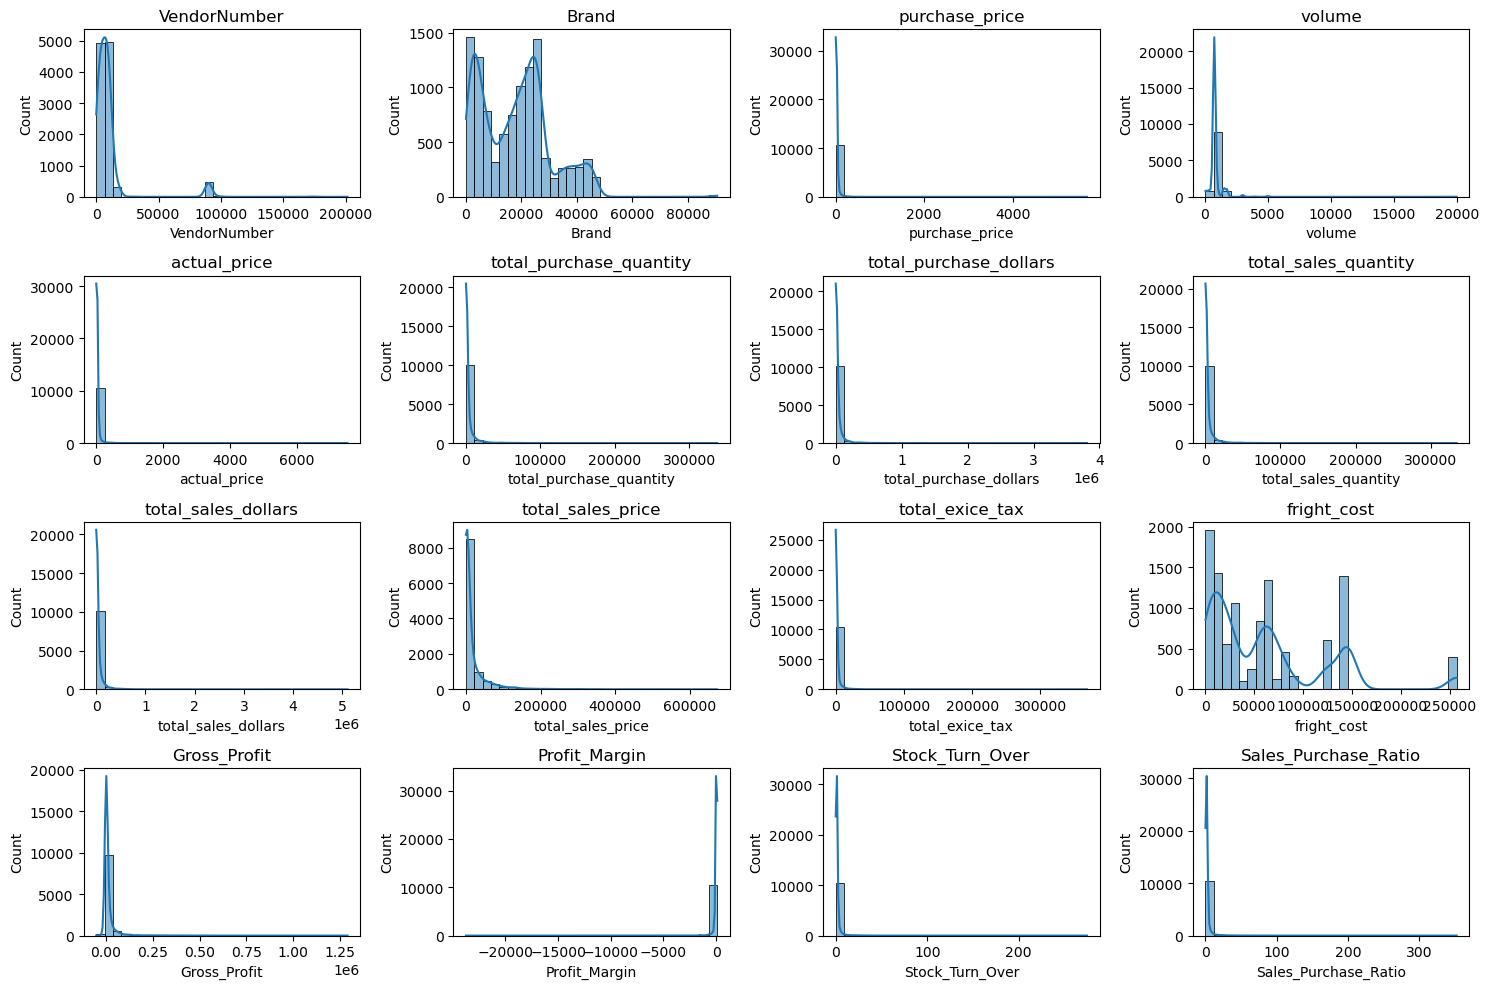

In [41]:
#Distribution plot for see distribution of data

plt.figure(figsize=(15,10))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()

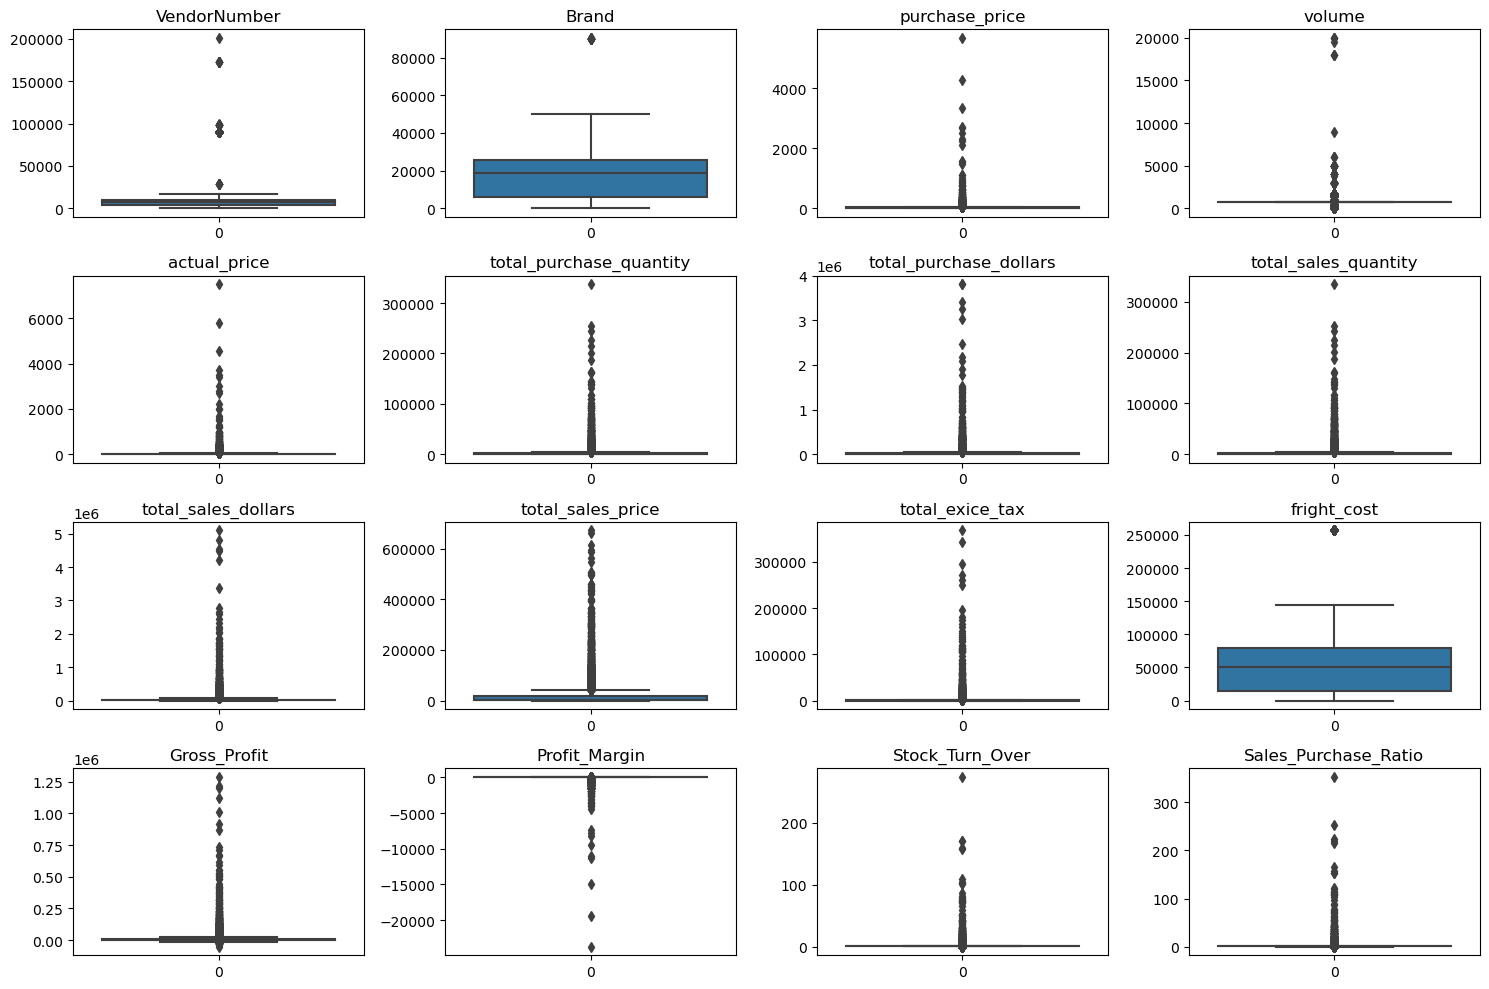

In [42]:
#Outliers Detection by using Box Plot

plt.figure(figsize=(15,10))

for i, col in enumerate(df_num.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

AS Based on our Analysis... we will not remove outliers completly. Because Some Outliers may be Primium Brands, that we have to analysis.   

In our Analysis(Based on Research Questions) We Want that records Whose Gross Profit, Profit Margine, Total Sales Quantity is atleast zero.   
Means we gonna, **remove inconsistancy from the records**. ie, removing records of Gross Profit, Profit Margine, Total Sales Quantity which are less than zero

In [7]:
#Considering only those Records which have Gross_promit, profit_margin, & total sales Quantity more than zero.

query = """SELECT * FROM vendor_sales_summary
           WHERE Gross_Profit > 0 AND
                 Profit_Margin > 0 AND
                 total_sales_quantity > 0"""

df_final = pd.read_sql_query(query,con=engine)
df_final

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost,Gross_Profit,Profit_Margin,Stock_Turn_Over,Sales_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2.0,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [7]:
df.shape, df_final.shape

((10692, 18), (8565, 18))

In [8]:
#Analysis on categorical Columns

df_cat=df_final.select_dtypes(include="object")

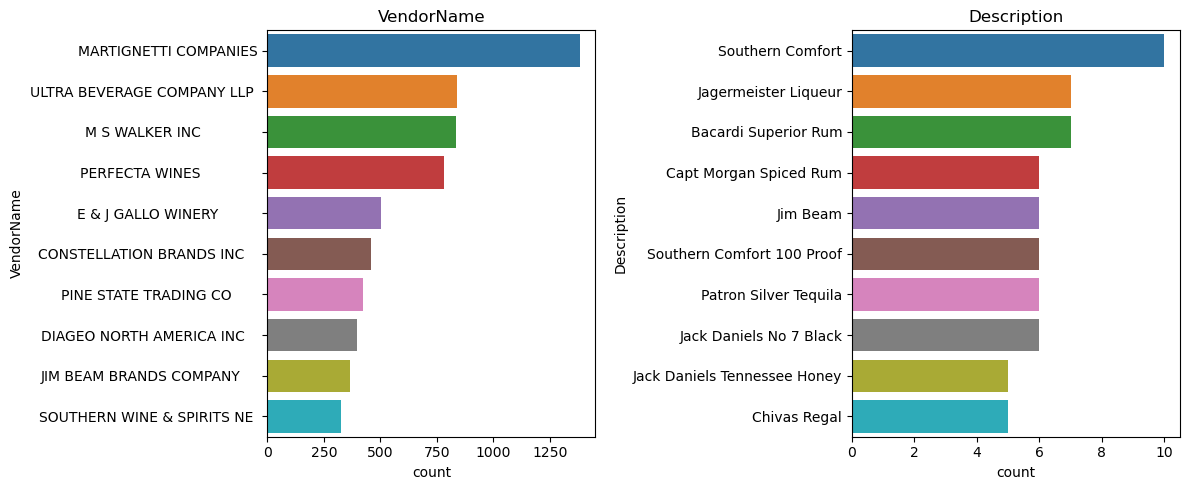

In [56]:
#Countplot for Categorical columns

plt.figure(figsize=(12,5))

for i, col in enumerate(df_cat.columns):
    plt.subplot(1,2,i+1)
    orders=df[col].value_counts().index[:10]
    sns.countplot(data=df, y=col,order=orders)
    plt.title(col)
    
plt.tight_layout()
plt.show()

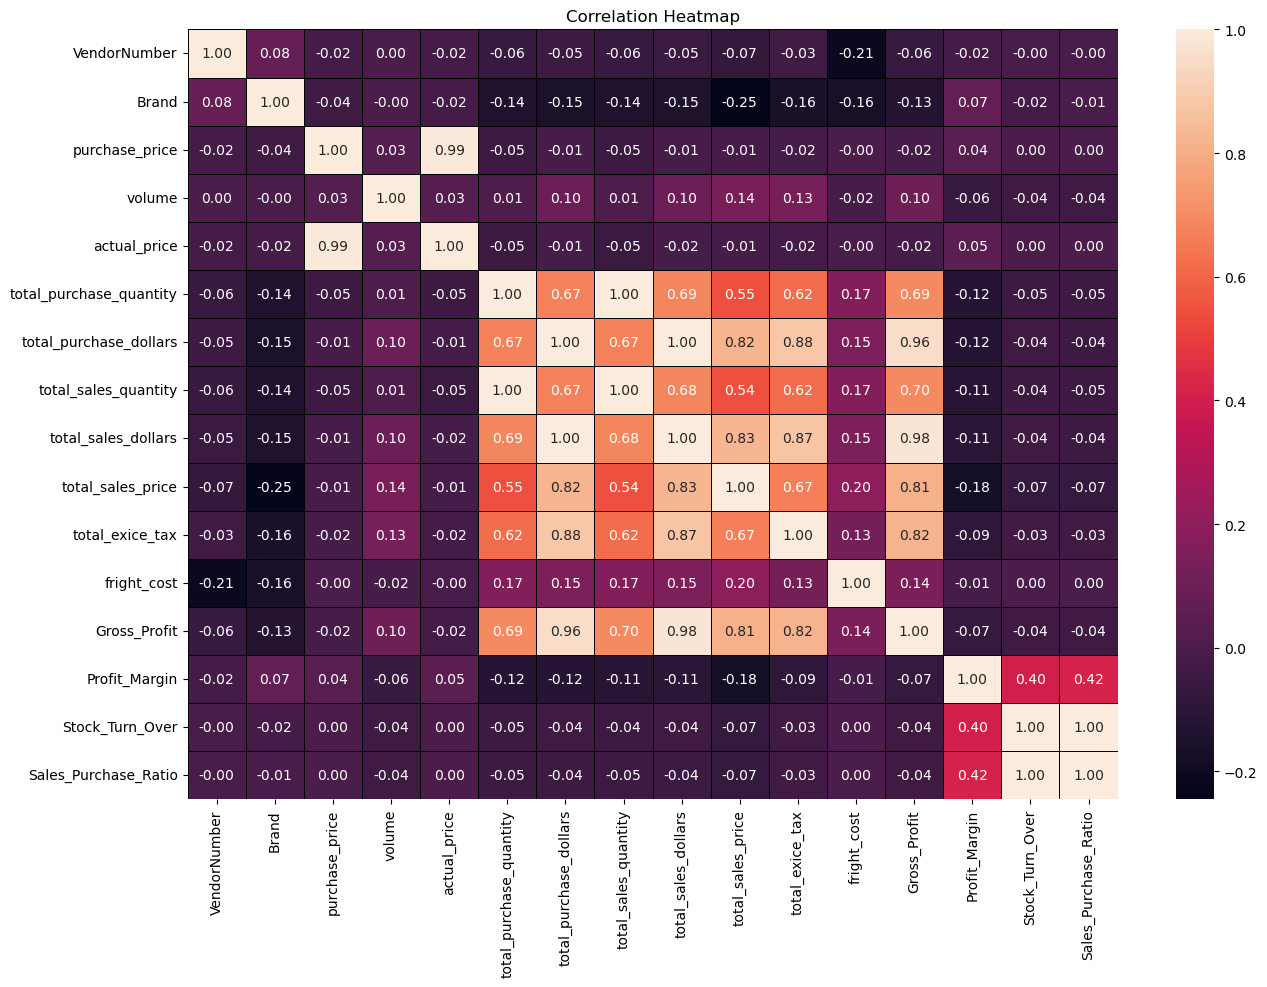

In [58]:
#Finding Corelations by using HeatMao
df_num2 = df_final.select_dtypes(include=["int","float"])

plt.figure(figsize=(15,10))

correlation= df_num2.corr()
sns.heatmap(correlation,annot=True,fmt='.2f',linewidth=0.5,linecolor="Black")
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights:**

1. PurchasePrice has weak corelation with TotalSalesDollars (-0.01) and GrossProfit(-0.02), suggesting that price variation do not significantly impact sales revenue or profit.
2. Strong corelation between purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
3. Negative correlation between profit margin & total sales price (-0.18) suggests that as sales price increases, margins decreses, possibly due to competative pricing pressures.
4. StockTurnover has weak negative corelation with both gross profit (-0.04) and Profit Margin (0.40)indicating the faster turnover does not necessarily result in higher Profitability.

### Data Analysis (Solving Research Questions)

**1. Identify Brands that need Promotional or Pricing Adjustment Which exhibit low sales performance but higher profit margins.**

In [8]:
df_final.head()

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost,Gross_Profit,Profit_Margin,Stock_Turn_Over,Sales_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [60]:
#finding out the brands, their total sales and average profit Margin

brand_performance = df_final.groupby("Description").agg({"total_sales_dollars":"sum","Profit_Margin":"mean"}).reset_index()
brand_performance

,Description,total_sales_dollars,Profit_Margin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


Now, we have to find those brands:
   1. Whose total_sale_dollar price is less than 15%
   2. whose profit margine is greater than 85%  
   
This is our **Thereshold Approch**: means we have to Select threshold value, means if the actual sale price of this brand is less than threshold value then this brands need promotional activity.
   1. 15% low_sales : which have been sold less
   2. 85% high_margin : who have high profit margin

In [61]:
low_sales = brand_performance["total_sales_dollars"].quantile(0.15)
low_sales

560.299

In [62]:
high_margin = brand_performance["Profit_Margin"].quantile(0.85)
high_margin

64.97017552750111

means, we have to find the brands name whose total_sales_dollars are below than 560.299 and whose Average Profit Margin is greter than 64.97.

In [64]:
target_brands = brand_performance[(brand_performance["total_sales_dollars"]<low_sales) & (brand_performance["Profit_Margin"]>high_margin)]

print("Brands With Low Sales but High Profit Margin")
display(target_brands.sort_values("total_sales_dollars"))

Brands With Low Sales but High Profit Margin


,Description,total_sales_dollars,Profit_Margin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


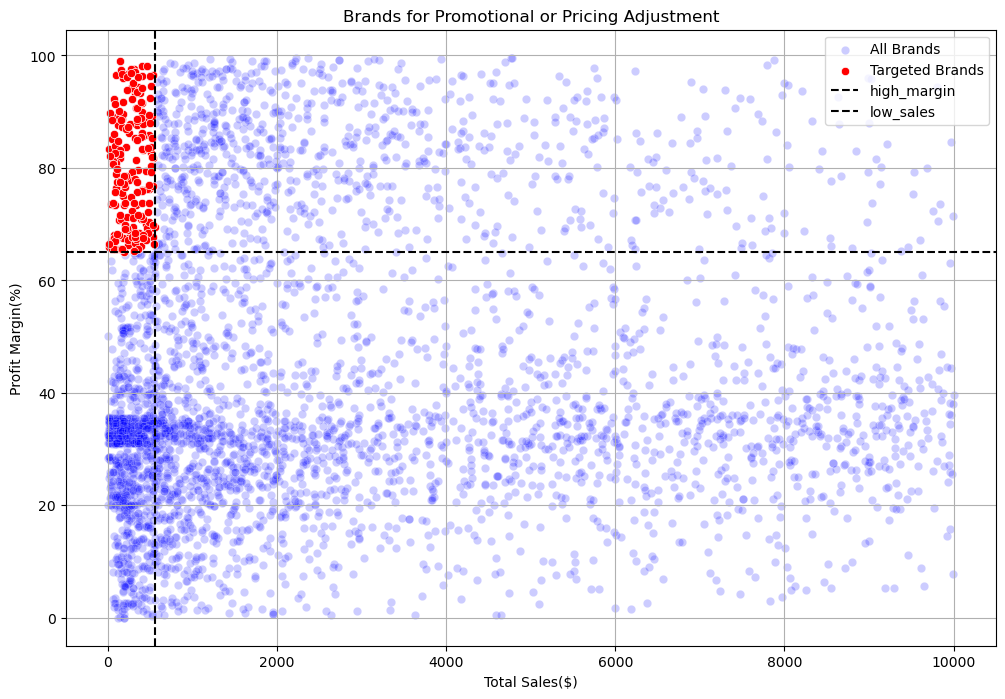

In [71]:
#By using scatter plot we can visualize the brands that we have to target:
#For only better visualization we are taking only 10000 Brands(just for better visualization), 
#this is not the visualization of all brands

brand_performance_10000 = brand_performance[brand_performance["total_sales_dollars"]<10000]

plt.figure(figsize=(12,8))

sns.scatterplot(data=brand_performance_10000, x="total_sales_dollars", y="Profit_Margin", color="blue", label="All Brands", 
                alpha=0.2)
sns.scatterplot(data=target_brands, x="total_sales_dollars", y="Profit_Margin", color="red", label="Targeted Brands")

plt.axhline(high_margin, linestyle="--", color="black", label="high_margin")
plt.axvline(low_sales, linestyle="--", color="black", label="low_sales")

plt.xlabel("Total Sales($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brands for Promotional or Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()

**2. Which Vendors and Brands demonstrate the high sales performance?**

we, will find top 10 brands names who have high sales performance.

In [73]:
df_final.head()

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost,Gross_Profit,Profit_Margin,Stock_Turn_Over,Sales_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [74]:
#Finding the top 10 vendor name according to their total sales

top_vendor = df_final.groupby("VendorName")["total_sales_dollars"].sum().nlargest(10)
top_vendor

VendorName
DIAGEO NORTH AMERICA INC       6.799010e+07
MARTIGNETTI COMPANIES          3.927640e+07
PERNOD RICARD USA              3.206320e+07
JIM BEAM BRANDS COMPANY        3.142302e+07
BACARDI USA INC                2.485482e+07
CONSTELLATION BRANDS INC       2.421875e+07
E & J GALLO WINERY             1.839990e+07
BROWN-FORMAN CORP              1.824723e+07
ULTRA BEVERAGE COMPANY LLP     1.650254e+07
M S WALKER INC                 1.470646e+07
Name: total_sales_dollars, dtype: float64

In [75]:
#Finding the top 10 brands according to their total sales

top_brands = df_final.groupby("Description")["total_sales_dollars"].sum().nlargest(10)
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: total_sales_dollars, dtype: float64

These are the Brands and vendor names of high performance, but we cannot read the total_sales_dollars properly. so we will change the values in Million "m" & Thousand "k".

In [13]:
#But as we see, the values are too big to read and to pronounce.
#so we will create a funtion so that big numbers can read in millions "M" & thousands "K"

def format_value(val):
    if val >= 1_000_000:
        return f"{val/1_000_000:.2f}M"
    elif val >= 1_000:
        return f"{val/1_000:.2f}K"
    else:
        return f"{val}"

In [84]:
#applying format_value Function on top vendors & top brands. 

formatted_top_vendor = top_vendor.apply(format_value)
formatted_top_brands = top_brands.apply(format_value)

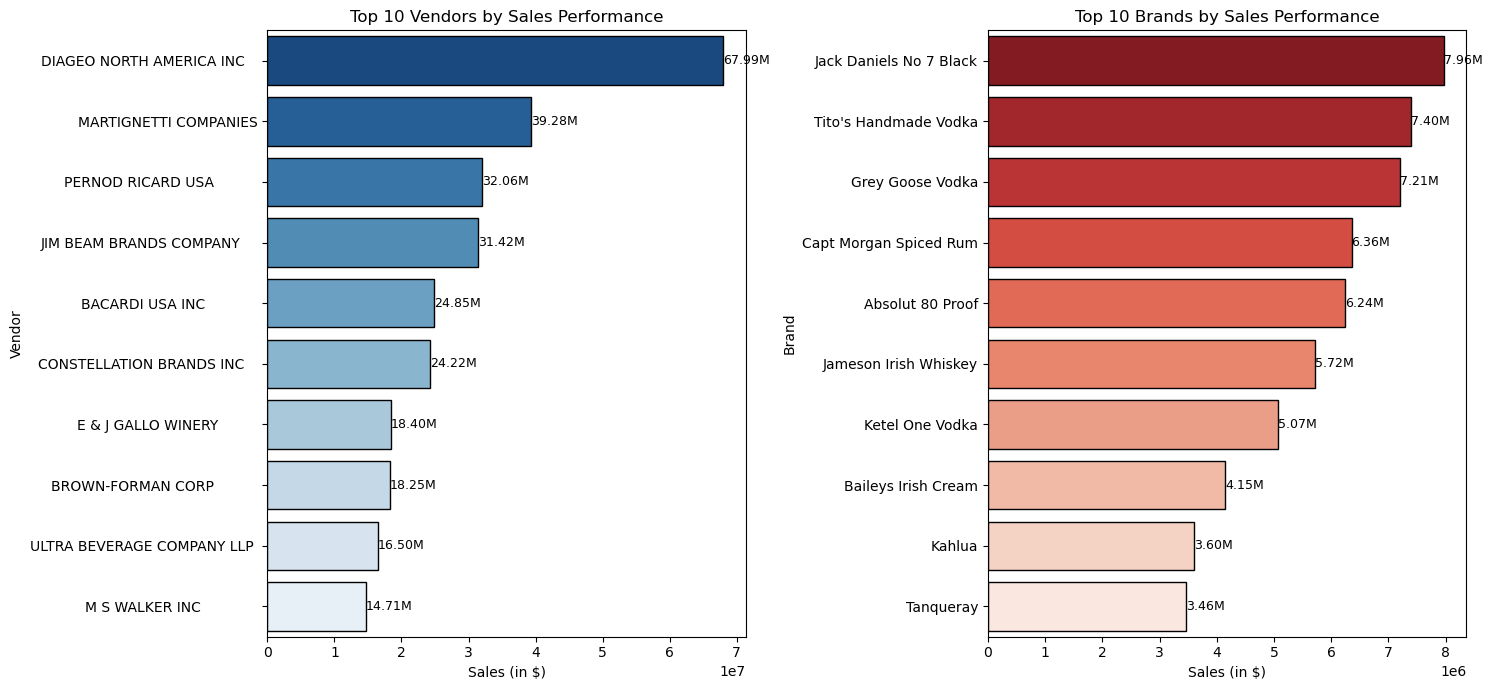

In [104]:
#Ploting Bar Graph for understanding by visualization

#For Top Vendors
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
ax = sns.barplot(y=formatted_top_vendor.index, x=top_vendor.values, palette="Blues_r",edgecolor='black')
plt.title("Top 10 Vendors by Sales Performance")
plt.xlabel("Sales (in $)")
plt.ylabel("Vendor")

# Show values on the bars
for i in range(len(top_vendor)):
    val = formatted_top_vendor.values[i]  # like '1.54M'
    x = top_vendor.values[i]
    y = i
    ax.text(x, y, val, va='center', ha='left', fontsize=9, color='black')


#For TOP Brands
plt.subplot(1, 2, 2)
ay=sns.barplot(y=formatted_top_brands.index, x=top_brands.values, palette="Reds_r",edgecolor='black')
plt.title("Top 10 Brands by Sales Performance")
plt.xlabel("Sales (in $)")
plt.ylabel("Brand")

# Show values on the bars
for i in range(len(top_brands)):
    val = formatted_top_brands.values[i]  # like '1.54M'
    x = top_brands.values[i]
    y = i
    ay.text(x, y, val, va='center', ha='left', fontsize=9, color='black')
    

plt.tight_layout()
plt.show()

**3. Which Vendor Contributes the most to the total Purchase Dollars? (IN PERCENTAGE)**

In [9]:
df_final.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'purchase_price',
       'volume', 'actual_price', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_sales_quantity', 'total_sales_dollars',
       'total_sales_price', 'total_exice_tax', 'fright_cost', 'Gross_Profit',
       'Profit_Margin', 'Stock_Turn_Over', 'Sales_Purchase_Ratio'],
      dtype='object')

In [18]:
vendor_contribute = df_final.groupby("VendorName").agg({"total_purchase_dollars":"sum","Gross_Profit":'sum',
                                                        'total_sales_dollars':'sum'}).reset_index()
vendor_contribute

,VendorName,total_purchase_dollars,Gross_Profit,total_sales_dollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [19]:
#Finding purchase contribution:

vendor_contribute["purchase_contribution"]=vendor_contribute["total_purchase_dollars"]/
                                                        vendor_contribute["total_purchase_dollars"].sum()
vendor_contribute

,VendorName,total_purchase_dollars,Gross_Profit,total_sales_dollars,purchase_contribution
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932


In [20]:
#Vendors purchase contribution sorted in desending order

vendor_sorted = vendor_contribute.sort_values('purchase_contribution', ascending=False)
vendor_sorted

,VendorName,total_purchase_dollars,Gross_Profit,total_sales_dollars,purchase_contribution
25,DIAGEO NORTH AMERICA INC,50097226.16,1.789287e+07,6.799010e+07,1.630033e-01
57,MARTIGNETTI COMPANIES,25464774.04,1.381162e+07,3.927640e+07,8.285575e-02
69,PERNOD RICARD USA,23851164.17,8.212032e+06,3.206320e+07,7.760548e-02
46,JIM BEAM BRANDS COMPANY,23494304.32,7.928716e+06,3.142302e+07,7.644435e-02
6,BACARDI USA INC,17432020.26,7.422797e+06,2.485482e+07,5.671926e-02
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,1.989500e+02,3.275900e+02,4.185611e-07
108,UNCORKED,118.74,5.820000e+01,1.769400e+02,3.863491e-07
86,SILVER MOUNTAIN CIDERS,77.18,2.653300e+02,3.425100e+02,2.511236e-07
16,CAPSTONE INTERNATIONAL,54.64,1.922300e+02,2.468700e+02,1.777843e-07


In [21]:
vendor_performance = vendor_sorted.copy()

# Format values ONLY for display
vendor_performance["total_purchase_dollars"] = vendor_performance["total_purchase_dollars"].apply(format_value)
vendor_performance["Gross_Profit"] = vendor_performance["Gross_Profit"].apply(format_value)
vendor_performance["total_sales_dollars"] = vendor_performance["total_sales_dollars"].apply(format_value)
vendor_performance["purchase_contribution"] = (vendor_sorted["purchase_contribution"] * 100).round(2)

#Display of Top 10 Vendors
top_vendor = vendor_performance.head(10)
top_vendor

,VendorName,total_purchase_dollars,Gross_Profit,total_sales_dollars,purchase_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [22]:
#Calculating Cummulative Result
top_vendor["cummulative_contribution"] = top_vendor["purchase_contribution"].cumsum()
top_vendor

,VendorName,total_purchase_dollars,Gross_Profit,total_sales_dollars,purchase_contribution,cummulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


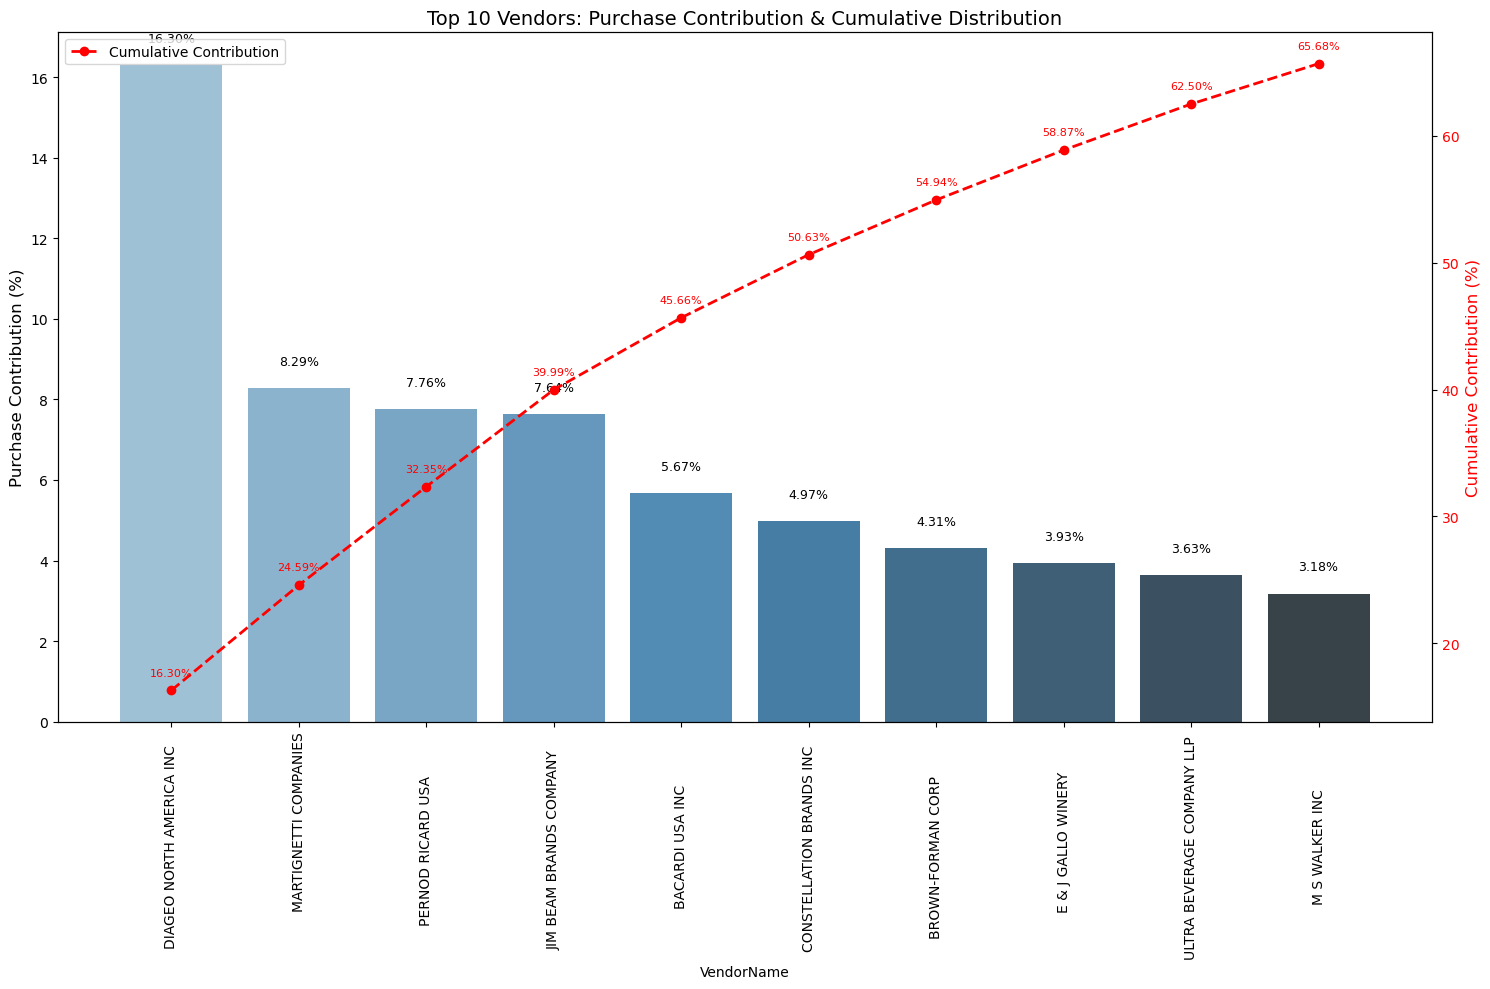

In [52]:
# Plotting bar graph and cummulative frequency result together for better understanding

fig, ax1 = plt.subplots(figsize=(15,10))

# Barplot for purchase contribution
sns.barplot(
    x="VendorName",
    y="purchase_contribution",
    data=top_vendor,
    ax=ax1,
    palette="Blues_d"
)

# Add bar labels (%)
for i, val in enumerate(top_vendor["purchase_contribution"]):
    ax1.text(i, val + 0.5, f"{val:.2f}%", ha='center', va='bottom', fontsize=9)

ax1.set_ylabel("Purchase Contribution (%)", fontsize=12)
ax1.set_xticklabels(top_vendor["VendorName"], rotation=90)
ax1.set_title("Top 10 Vendors: Purchase Contribution & Cumulative Distribution", fontsize=14)

# Create second y-axis for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendor["VendorName"],
    top_vendor["cummulative_contribution"],
    color="red",
    marker="o",
    linestyle="--",
    linewidth=2,
    label="Cumulative Contribution"
)
ax2.set_ylabel("Cumulative Contribution (%)", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add red line labels (optional)
for i, val in enumerate(top_vendor["cummulative_contribution"]):
    ax2.text(i, val + 1, f"{val:.2f}%", color='red', ha='center', va='bottom', fontsize=8)

# Legend
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


**4. How much of total Procurement(Purchase) is depend on the top vendors?**

In [26]:
#Finding out the top 10 vendors percentage on purchase contribtion
total_procurement = top_vendor["purchase_contribution"].sum()

print("Total Purchase contribution of Top 10 Vendors is : ",total_procurement,"%")

Total Purchase contribution of Top 10 Vendors is :  65.68 %


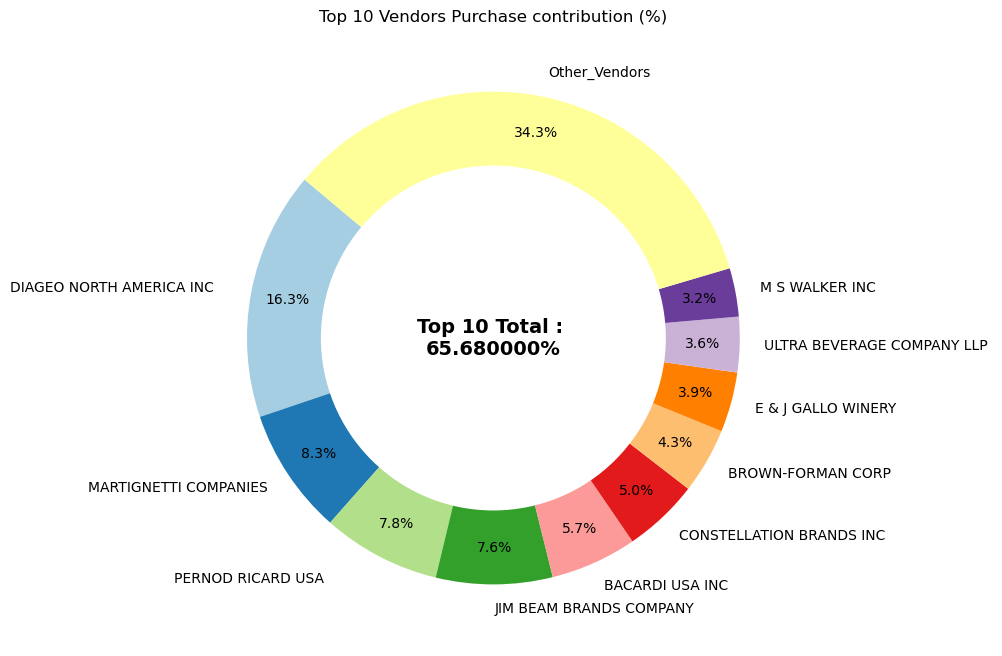

In [31]:
#plotting Total Procurement & their contribution by plotting pie chart

vendors =list(top_vendor["VendorName"].values)
purchase_contribution =list(top_vendor["purchase_contribution"].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100-total_contribution

#Append other_vendors category
vendors.append("Other_Vendors")
purchase_contribution.append(remaining_contribution)

#Donut Chart
fig, ax =plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct="%1.1f%%",
                                 startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the centre to create a donut effect
centre_circle = plt.Circle((0,0),0.70, fc="white")
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the centre
plt.text(0,0,f"Top 10 Total : \n{total_contribution:2f}%",fontsize=14, fontweight="bold", ha="center", va="center")

plt.title("Top 10 Vendors Purchase contribution (%)")
plt.show()

**5. Does Purchasing in Bulk reduce the unit price, and what is the optional Purchase volume for cost savings?**

In [32]:
df_final.head()

,VendorNumber,VendorName,Brand,Description,purchase_price,volume,actual_price,total_purchase_quantity,total_purchase_dollars,total_sales_quantity,total_sales_dollars,total_sales_price,total_exice_tax,fright_cost,Gross_Profit,Profit_Margin,Stock_Turn_Over,Sales_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [47]:
#Finding out per Unit purchase price of product

df_final["unit_purchase_price"] = df_final["total_purchase_dollars"]/df_final["total_purchase_quantity"]

In [48]:
#According to Purchase Quantity we will categories it in small, medium, large Purchase Quantity

df_final["order_size"]=pd.qcut(df_final["total_purchase_quantity"],q=3,labels=["small","medium","large"])
df_final["order_size"]

0       large
1       large
2       large
3       large
4       large
        ...  
8560    small
8561    small
8562    small
8563    small
8564    small
Name: order_size, Length: 8565, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [49]:
df_final[["order_size","total_purchase_quantity"]]

,order_size,total_purchase_quantity
0,large,145080.0
1,large,164038.0
2,large,187407.0
3,large,201682.0
4,large,138109.0
...,...,...
8560,small,2.0
8561,small,6.0
8562,small,2.0
8563,small,1.0


In [50]:
#We have categorise the purchase quantity in Large, Medium, Small categories.
#Now we will identify the mean of their Categories

df_final.groupby("order_size")[["unit_purchase_price"]].mean()

,unit_purchase_price
order_size,
small,39.057543
medium,15.486414
large,10.777625


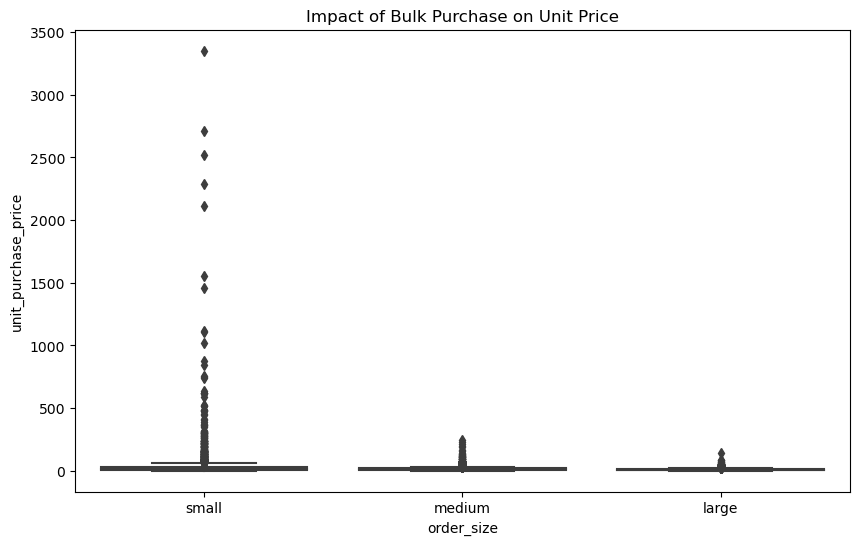

In [53]:
#Understanding purchase quantity by Plotting bar plot

plt.figure(figsize=(10,6))
plt.title("Impact of Bulk Purchase on Unit Price")
plt.xlabel("Order size")
plt.ylabel("Total Purchase Quantity")
sns.boxplot(data=df_final, x="order_size", y="unit_purchase_price")

plt.show()

- vendors buying in bulk(Large Order Size) get the Lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.  

- The Price Diffrence between Small & Large orders is Substaintial (-72% reduction in unit cost)   
- This Suggests that bulk pricing succesfully encourage vendors to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue.

**6. Which Vendors have low inventory turnover, indicating excess stock and slow-moving product?**

In [54]:
#We gonna take that vendors whose Stock Turnover is less than 1

vendor_stock_turnover = df_final[df_final["Stock_Turn_Over"]<1]

In [62]:
#Finding out the top 10 Vendor name & Their avg stock turnover assending wise

vendorname_stock_turnover = vendor_stock_turnover.groupby("VendorName")[["Stock_Turn_Over"]].mean().
                                                                   sort_values("Stock_Turn_Over",ascending=True).head(10)
vendorname_stock_turnover =vendorname_stock_turnover.reset_index()
vendorname_stock_turnover

,VendorName,Stock_Turn_Over
0,ALISA CARR BEVERAGES,0.615385
1,HIGHLAND WINE MERCHANTS LLC,0.708333
2,PARK STREET IMPORTS LLC,0.751306
3,Circa Wines,0.755676
4,Dunn Wine Brokers,0.766022
5,CENTEUR IMPORTS LLC,0.773953
6,SMOKY QUARTZ DISTILLERY LLC,0.783835
7,TAMWORTH DISTILLING,0.797078
8,THE IMPORTED GRAPE LLC,0.807569
9,WALPOLE MTN VIEW WINERY,0.820548


-This are the Top 10 vendors, who have inventory turnover from **0.615 - 0.820**  

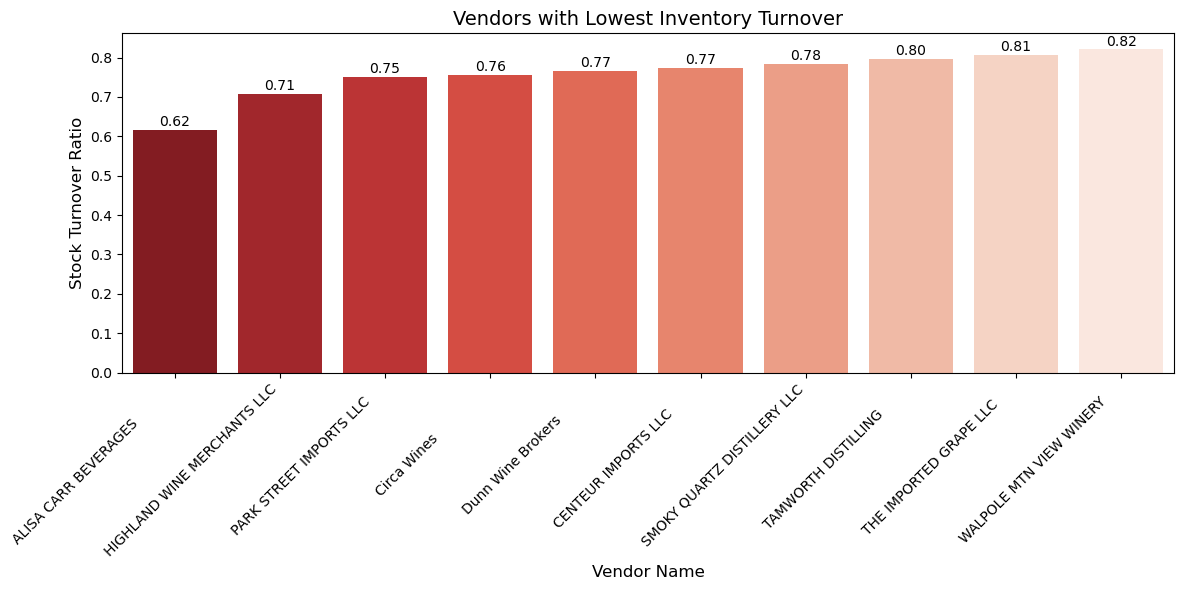

In [77]:
#Plotting bar plot for visualization
plt.figure(figsize=(12,6))


sns.barplot(data=vendorname_stock_turnover, y='Stock_Turn_Over', x='VendorName', palette='Reds_r')
plt.title("Vendors with Lowest Inventory Turnover",fontsize=14)
plt.xlabel("Vendor Name", fontsize=12)
plt.ylabel("Stock Turnover Ratio",fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add bar labels
for i, val in enumerate(vendorname_stock_turnover["Stock_Turn_Over"]):
    plt.text(i, val + 0.01,f"{val:.2f}", ha='center', fontsize=10)


plt.tight_layout()
plt.show()


**7. How Much Capital is locked in Unsold inventory per vendor and which vendors contribute the most?**

In [84]:
#Finding total unsold capital by vendors

df_final["unsold_inventory_value"]= (df_final["total_purchase_quantity"]-df_final["total_sales_quantity"])
                                                                                               *df_final["purchase_price"]

print("Total unsold capital :",format_value(df_final["unsold_inventory_value"].sum()))

Total unsold capital : 2.71M


In [87]:
inventory_value_per_vendor = df_final.groupby("VendorName")["unsold_inventory_value"].sum().reset_index()
inventory_value_per_vendor

,VendorName,unsold_inventory_value
0,ADAMBA IMPORTS INTL INC,-91.52
1,ALISA CARR BEVERAGES,-43151.48
2,ALTAMAR BRANDS LLC,464.23
3,AMERICAN SPIRITS EXCHANGE,116.76
4,AMERICAN VINTAGE BEVERAGE,3672.17
...,...,...
115,WEIN BAUER INC,1732.03
116,WESTERN SPIRITS BEVERAGE CO,-949.61
117,WILLIAM GRANT & SONS INC,401960.83
118,WINE GROUP INC,86862.57


In [95]:
#sorting vendors with highest locked capital

inventory_value_per_vendor =inventory_value_per_vendor.sort_values(by = "unsold_inventory_value", 
                                                                   ascending=False)

inventory_value_per_vendor["formatted_value"] = inventory_value_per_vendor["unsold_inventory_value"].apply(format_value)

inventory_value_per_vendor[["VendorName", "unsold_inventory_value", "formatted_value"]].head(10)


,VendorName,unsold_inventory_value,formatted_value
25,DIAGEO NORTH AMERICA INC,722209.05,722.21K
46,JIM BEAM BRANDS COMPANY,554665.63,554.67K
69,PERNOD RICARD USA,470625.61,470.63K
117,WILLIAM GRANT & SONS INC,401960.83,401.96K
30,E & J GALLO WINERY,228282.61,228.28K
80,SAZERAC CO INC,198436.41,198.44K
11,BROWN-FORMAN CORP,177733.74,177.73K
20,CONSTELLATION BRANDS INC,133617.62,133.62K
62,MOET HENNESSY USA INC,126477.70,126.48K
78,REMY COINTREAU USA INC,118598.15,118.60K


**8. What is the 95% Confidence intervals for Profit Margin of top-performing & low-performing Vendors?**

In [97]:
df_final.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'purchase_price',
       'volume', 'actual_price', 'total_purchase_quantity',
       'total_purchase_dollars', 'total_sales_quantity', 'total_sales_dollars',
       'total_sales_price', 'total_exice_tax', 'fright_cost', 'Gross_Profit',
       'Profit_Margin', 'Stock_Turn_Over', 'Sales_Purchase_Ratio',
       'unit_purchase_price', 'order_size', 'unsold_inventory_value'],
      dtype='object')

In [98]:
#we will set the threshold value

top_threshold = df["total_sales_dollars"].quantile(0.75)
low_threshold = df["total_sales_dollars"].quantile(0.25)

In [101]:
#Filter out the data on the basis of thresholds

top_vendor = df_final[df_final["total_sales_dollars"]>=top_threshold]["Profit_Margin"].dropna()

low_vendor = df_final[df_final["total_sales_dollars"]<=low_threshold]["Profit_Margin"].dropna()

In [102]:
top_vendor

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
4751    93.085860
4832    90.021514
4833    89.883453
4920    95.012530
5050    94.271857
Name: Profit_Margin, Length: 2590, dtype: float64

In [103]:
low_vendor

6228     0.473608
6269     9.082595
6270     7.598007
6274     3.245922
6279     1.734104
          ...    
8560    83.448276
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: Profit_Margin, Length: 1528, dtype: float64

In [112]:
#We will calculate the confidence interval:

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err  = stats.sem(data)
    margin_of_err = std_err * stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    return mean_val, mean_val - margin_of_err, mean_val + margin_of_err

In [119]:
top_mean, top_lower, top_upper = confidence_interval(top_vendor)
print("Mean :", top_mean)
print("Top Lower",top_lower)
print("Top Upper",top_upper)

Mean : 31.48798712571066
Top Lower 31.07359134059894
Top Upper 31.90238291082238


In [120]:
low_mean, low_lower, low_upper = confidence_interval(low_vendor)
print("Low Mean",low_mean)
print("Low Lower",low_lower)
print("Low Upper", low_upper)

Low Mean 39.237784341731384
Low Lower 38.05390398675655
Low Upper 40.421664696706216


Top vendor 95% CI : (31.07, 31.90),Mean:31.49
Low vendor 95% CI : (38.05, 40.42),Mean:39.24


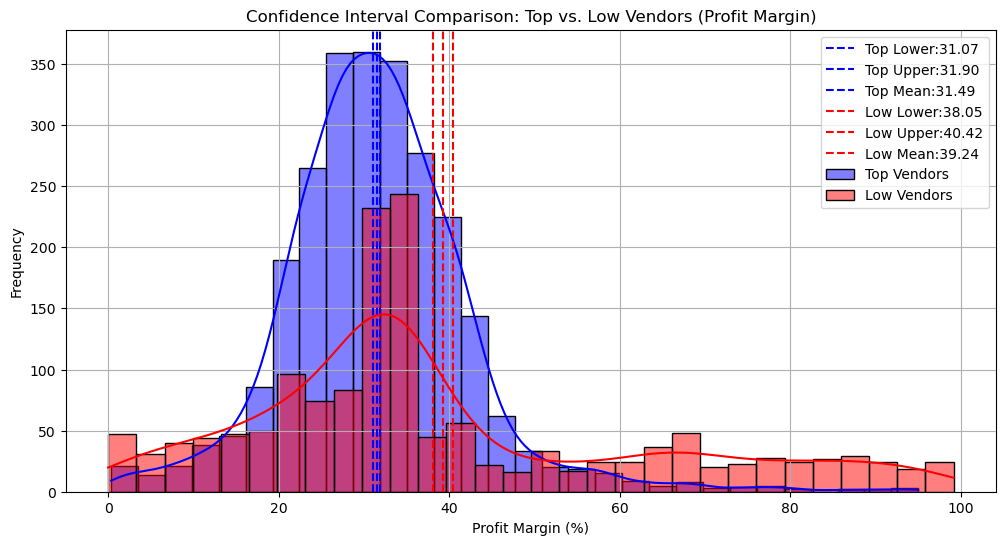

In [121]:
print(f"Top vendor 95% CI : ({top_lower:.2f}, {top_upper:.2f}),Mean:{top_mean:.2f}")
print(f"Low vendor 95% CI : ({low_lower:.2f}, {low_upper:.2f}),Mean:{low_mean:.2f}")

plt.figure(figsize=(12,6))

#Top Vendors Plot
sns.histplot(top_vendor, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean:{top_mean:.2f}")

#Low Vendor Plot
sns.histplot(low_vendor, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower:{low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper:{low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean:{low_mean:.2f}")

#Finalizing Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The Confidence interval for low-performing vendors (38.05-40.42%) is significantly higher than that of top-performing vendors (31.07-31.90%)   
- This Suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing vendors: if they aim to improve profitability, they could explore selective price adjustment, cost optimization, or building strategies.
- For Low-performing vendors: Despite higher margins,their low sales volume might indicate a need for better marketing, competative pricing, or improved distribution strategies.

**9. Is there a significant diffrence in Profit margins between top-performing & low-performing vendors?**

Hypothesis:  
  
  **Ho(Null Hypothesis):** There is no significant diffrence in the mean profit margins of top-performing and low-performing vendors.     
  
  **H1(Alternative Hypothesis):** The mean Profit margins of top-performing and low-performing Vendors are significantly differant.

In [122]:
#performing Two Sample T-test

t_stat, p_value = ttest_ind(top_vendor, low_vendor, equal_var=False)

#Print the result
print(f"T-Statistic: {t_stat:.4f}, P-Value:{p_value:.4f}")
if p_value<0.05:
    print("Reject Ho: There is a Significant diffrence in Profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant diffrence in profit margins.")

T-Statistic: -12.1189, P-Value:0.0000
Reject Ho: There is a Significant diffrence in Profit margins between top and low-performing vendors.
